# Capital Bikeshare Project:

Objective: Examine patterns in Capital Bikeshare ridership

Data Sources: Capital Bikeshare Data, Open Weather Map, Open Data DC

In [156]:
#Import dependencies
import path
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Loop thru all CSV files, and add to DataFrame
list_ = []

path = 'CSV Files' - #Change to relative path!
allFiles = glob.glob(path + "/*.csv")

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

frame = pd.concat(list_, axis = 0, ignore_index = True)

frame.head()

In [266]:
#Create new DataFrame with Start Date as index
m = frame.set_index(pd.DatetimeIndex(frame['Start date']))

m['Hour'] = m.index.hour
m['Month'] = m.index.month
m['Date'] = m.index.date
m['Weekday'] = m.index.weekday

#Group by hour, date and month for each member type
casual_hour = m.loc[m['Member type'] == 'Casual', :].groupby('Hour')['Bike number'].count()
casual_date = m.loc[m['Member type'] == 'Casual', :].groupby('Date')['Bike number'].count()
casual_month = m.loc[m['Member type'] == 'Casual', :].groupby('Month')['Bike number'].count()
casual_weekday = m.loc[m['Member type'] == 'Casual', :].groupby('Weekday')['Bike number'].count()

member_hour = m.loc[m['Member type'] == 'Member', :].groupby('Hour')['Bike number'].count()
member_date = m.loc[m['Member type'] == 'Member', :].groupby('Date')['Bike number'].count()
member_month = m.loc[m['Member type'] == 'Member', :].groupby('Month')['Bike number'].count()
member_weekday = m.loc[m['Member type'] == 'Member', :].groupby('Weekday')['Bike number'].count()

m.head(10)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Hour,Month,Date,Weekday
Start date,,,,,,,,,,,,,
2018-05-01 00:00:00,679,2018-05-01 00:00:00,2018-05-01 00:11:19,31302,Wisconsin Ave & Newark St NW,31307,3000 Connecticut Ave NW / National Zoo,W22771,Member,0,5,2018-05-01,1
2018-05-01 00:00:20,578,2018-05-01 00:00:20,2018-05-01 00:09:59,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,W21320,Casual,0,5,2018-05-01,1
2018-05-01 00:00:28,580,2018-05-01 00:00:28,2018-05-01 00:10:09,31232,7th & F St NW / National Portrait Gallery,31609,Maine Ave & 7th St SW,W20863,Casual,0,5,2018-05-01,1
2018-05-01 00:01:22,606,2018-05-01 00:01:22,2018-05-01 00:11:29,31104,Adams Mill & Columbia Rd NW,31509,New Jersey Ave & R St NW,W00822,Member,0,5,2018-05-01,1
2018-05-01 00:04:52,582,2018-05-01 00:04:52,2018-05-01 00:14:34,31129,15th St & Pennsylvania Ave NW/Pershing Park,31118,3rd & Elm St NW,W21846,Member,0,5,2018-05-01,1
2018-05-01 00:06:39,175,2018-05-01 00:06:39,2018-05-01 00:09:34,31104,Adams Mill & Columbia Rd NW,31117,15th & Euclid St NW,W22986,Member,0,5,2018-05-01,1
2018-05-01 00:07:24,1605,2018-05-01 00:07:24,2018-05-01 00:34:09,31264,6th St & Indiana Ave NW,31641,2nd St & Massachusetts Ave NE,W21891,Casual,0,5,2018-05-01,1
2018-05-01 00:07:37,1591,2018-05-01 00:07:37,2018-05-01 00:34:08,31264,6th St & Indiana Ave NW,31641,2nd St & Massachusetts Ave NE,W22665,Casual,0,5,2018-05-01,1
2018-05-01 00:07:47,509,2018-05-01 00:07:47,2018-05-01 00:16:16,31116,California St & Florida Ave NW,31203,14th & Rhode Island Ave NW,W01330,Member,0,5,2018-05-01,1


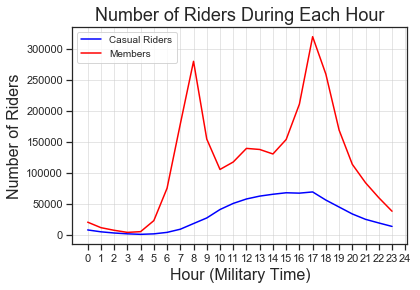

In [279]:
#Create line plot for ridership vs. hour
x_axis = np.arange(0,24,1)

casual_hour_plt = plt.plot(x_axis, casual_hour, color = 'blue', label = 'Casual Riders')
member_hour_plt = plt.plot(x_axis, member_hour, color = 'red', label = 'Members')

plt.title('Number of Riders During Each Hour', fontsize = 18)
plt.xlabel('Hour (Military Time)', fontsize = 16)
plt.xticks(np.arange(0, 25, step = 1))
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Hour.png')

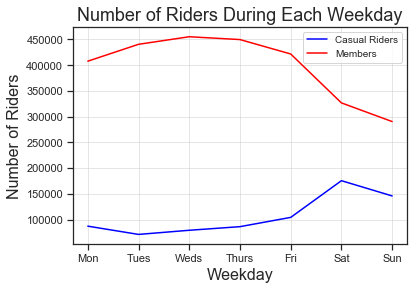

In [276]:
#Create line plot for ridership vs. month
x_axis = ['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun']

casual_weekday_plt = plt.plot(x_axis, casual_weekday, color = 'blue', label = 'Casual Riders')
member_weekday_plt = plt.plot(x_axis, member_weekday, color = 'red', label = 'Members')

plt.title('Number of Riders During Each Weekday', fontsize = 18)
plt.xlabel('Weekday', fontsize = 16)
plt.xticks(np.arange(0, 7, step = 1))
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Weekday.png')

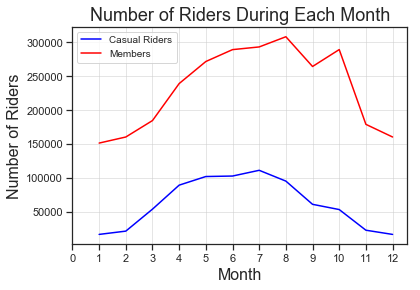

In [275]:
#Create line plot for ridership vs. month
x_axis = np.arange(1,13,1)

casual_month_plt = plt.plot(x_axis, casual_month, color = 'blue', label = 'Casual Riders')
member_month_plt = plt.plot(x_axis, member_month, color = 'red', label = 'Members')

plt.title('Number of Riders During Each Month', fontsize = 18)
plt.xlabel('Month', fontsize = 16)
plt.xticks(np.arange(0, 13, step = 1))
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Month.png')

In [255]:
#Import weather CSV

file = '/Users/hannah/Desktop/WeatherData.csv' #Change to relative path

weather_frame = pd.read_csv(file, index_col=0, parse_dates=True)

weather_frame = weather_frame.dropna(axis=1, how='any')

weather_frame = weather_frame.groupby(weather_frame['dt_iso']).first()

weather_frame.reset_index(inplace=True)

weather_frame


,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2018-01-01 00:00:00 +0000 UTC,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n
1,2018-01-01 01:00:00 +0000 UTC,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n
2,2018-01-01 02:00:00 +0000 UTC,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n
3,2018-01-01 03:00:00 +0000 UTC,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n
4,2018-01-01 04:00:00 +0000 UTC,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n
5,2018-01-01 05:00:00 +0000 UTC,4366164,263.15,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n
6,2018-01-01 06:00:00 +0000 UTC,4366164,262.71,259.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n
7,2018-01-01 07:00:00 +0000 UTC,4366164,261.93,258.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n
8,2018-01-01 08:00:00 +0000 UTC,4366164,261.40,257.15,265.15,1031,84,2,327,1,800,Clear,sky is clear,01n
9,2018-01-01 09:00:00 +0000 UTC,4366164,260.83,257.15,264.15,1031,56,2,240,1,800,Clear,sky is clear,01n


In [261]:
#Convert UTC time to datetime format
weather_frame['dt_iso'] = pd.to_datetime(weather_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S +0000 %Z')

#Create new column for precipitation
weather_frame['precipitation'] = weather_frame['weather_id']
weather_frame['precipitation'] = weather_frame['precipitation'].astype(float)

weather_frame.head(100)


,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,precipitation
0,2018-01-01 00:00:00,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n,800.0
1,2018-01-01 01:00:00,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n,800.0
2,2018-01-01 02:00:00,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n,800.0
3,2018-01-01 03:00:00,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n,800.0
4,2018-01-01 04:00:00,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,800.0
5,2018-01-01 05:00:00,4366164,263.15,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,800.0
6,2018-01-01 06:00:00,4366164,262.71,259.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n,800.0
7,2018-01-01 07:00:00,4366164,261.93,258.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n,800.0
8,2018-01-01 08:00:00,4366164,261.40,257.15,265.15,1031,84,2,327,1,800,Clear,sky is clear,01n,800.0
9,2018-01-01 09:00:00,4366164,260.83,257.15,264.15,1031,56,2,240,1,800,Clear,sky is clear,01n,800.0


In [256]:
#Convert precipitation codes to numerical values - information from Open Weather e-mail

for i,row in weather_frame.iterrows():
    if row['weather_id'] == 500:
        weather_frame.at[i,'precipitation'] = 0.5
    elif row['weather_id'] == 501:
        weather_frame.at[i, 'precipitation'] = 1.5
    elif row['weather_id'] == 502:
        weather_frame.at[i, 'precipitation'] = 10
    elif row['weather_id'] == 503:
        weather_frame.at[i, 'precipitation'] = 33
    elif row['weather_id'] == 504:
        weather_frame.at[i, 'precipitation'] = 50
    elif row['weather_id'] == 600:
        weather_frame.at[i, 'precipitation'] = 0.5
    elif row['weather_id'] == 601:
        weather_frame.at[i, 'precipitation'] = 2.75
    elif row['weather_id'] == 602:
        weather_frame.at[i, 'precipitation'] = 5
    else:
        weather_frame.at[i, 'precipitation'] = 0

weather_frame.head(120)

,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,precipitation
0,2018-01-01 00:00:00 +0000 UTC,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n,0.0
1,2018-01-01 01:00:00 +0000 UTC,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n,0.0
2,2018-01-01 02:00:00 +0000 UTC,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n,0.0
3,2018-01-01 03:00:00 +0000 UTC,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n,0.0
4,2018-01-01 04:00:00 +0000 UTC,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,0.0
5,2018-01-01 05:00:00 +0000 UTC,4366164,263.15,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,0.0
6,2018-01-01 06:00:00 +0000 UTC,4366164,262.71,259.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n,0.0
7,2018-01-01 07:00:00 +0000 UTC,4366164,261.93,258.15,265.15,1030,56,2,240,1,800,Clear,sky is clear,01n,0.0
8,2018-01-01 08:00:00 +0000 UTC,4366164,261.40,257.15,265.15,1031,84,2,327,1,800,Clear,sky is clear,01n,0.0
9,2018-01-01 09:00:00 +0000 UTC,4366164,260.83,257.15,264.15,1031,56,2,240,1,800,Clear,sky is clear,01n,0.0


In [262]:
#Set index to date, and add date column
n = weather_frame.set_index(pd.DatetimeIndex(weather_frame['dt_iso']))

n['Date'] = n.index.date

n.head()

,dt_iso,city_id,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_id,weather_main,weather_description,weather_icon,precipitation,Date
dt_iso,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,4366164,265.32,263.15,267.15,1029,48,2,240,1,800,Clear,sky is clear,01n,800.0,2018-01-01
2018-01-01 01:00:00,2018-01-01 01:00:00,4366164,264.10,261.15,266.15,1029,52,2,230,1,800,Clear,sky is clear,01n,800.0,2018-01-01
2018-01-01 02:00:00,2018-01-01 02:00:00,4366164,263.82,261.15,266.15,1030,52,3,230,1,800,Clear,sky is clear,01n,800.0,2018-01-01
2018-01-01 03:00:00,2018-01-01 03:00:00,4366164,263.38,260.15,265.15,1030,52,2,230,1,800,Clear,sky is clear,01n,800.0,2018-01-01
2018-01-01 04:00:00,2018-01-01 04:00:00,4366164,263.20,260.15,265.15,1030,52,1,230,1,800,Clear,sky is clear,01n,800.0,2018-01-01


In [247]:
#Calculate average temp per day
temp_groups = n.groupby('Date')['temp'].mean()

#Convert to Celcius from Kelvin
temp_groups_cels = (temp_groups - 273.15)

In [248]:
#Calculate total precipitation per day
precip_groups = n.groupby('Date')['precipitation'].sum()

In [264]:
#Create new DataFrame to combine riders, and weather data
weather_df = pd.DataFrame({'Casual': casual_date, 'Members': member_date, 'Average Temp (Celcius)': temp_groups_cels, 'Precipitation (mm/day)': precip_groups})

weather_df.reset_index()

weather_df.head()

,Casual,Members,Average Temp (Celcius),Precipitation (mm/day)
Date,,,,
2018-01-01,145,1068,-8.912500,0.00
2018-01-02,179,3613,-8.467083,0.50
2018-01-03,279,4469,-7.958333,0.00
2018-01-04,66,2302,-3.337500,15.25
2018-01-05,62,2647,-8.720000,0.00


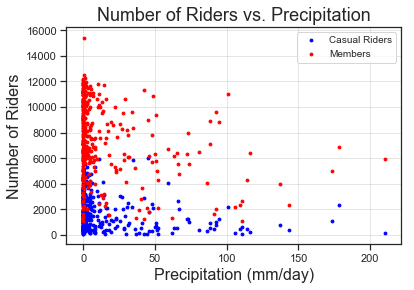

In [277]:
#Create scatter plot for ridership vs. precipitation
casual_precip_plt = plt.scatter(precip_groups, casual_date, color = 'blue', s = 8, label = 'Casual Riders')
member_precip_plt = plt.scatter(precip_groups, member_date, color = 'red', s = 8, label = 'Members')

plt.title('Number of Riders vs. Precipitation', fontsize = 18)
plt.xlabel('Precipitation (mm/day)', fontsize = 16)
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Precipitation.png')

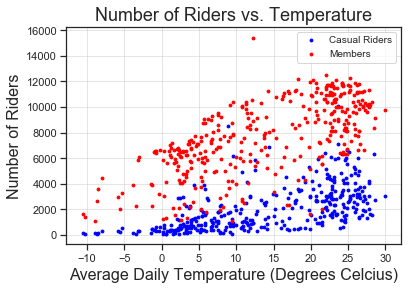

In [280]:
#Create scatter plot for ridership vs. temperature
casual_temp_plt = plt.scatter(date_groups_cels, casual_date, color = 'blue', s = 8, label = 'Casual Riders')
member_temp_plt = plt.scatter(date_groups_cels, member_date, color = 'red', s = 8, label = 'Members')

plt.title('Number of Riders vs. Temperature', fontsize = 18)
plt.xlabel('Average Daily Temperature (Degrees Celcius)', fontsize = 16)
plt.ylabel('Number of Riders', fontsize = 16)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', prop={'size': 10})
plt.savefig('Ridership vs. Temperature.png')